


# Import thư viện




In [47]:
import numpy as np
import pandas as pd
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

#đọc dữ liệu

In [49]:
dataset_train = pd.read_csv("/content/train_u6lujuX_CVtuZ9i.csv")
dataset_test = pd.read_csv("/content/test_Y3wMUE5_7gLdaTN.csv")
dataset_train = dataset_train.iloc[:,2:9]
dataset_test = dataset_test.iloc[:,2:9]
dataset_train = dataset_train.drop(dataset_train.columns[[4,5]], axis=1)
dataset_test = dataset_test.drop(dataset_test.columns[[4,5]], axis=1)
dataset_train.apply(lambda x: sum (x.isnull ()), axis = 0) 

Married           3
Dependents       15
Education         0
Self_Employed    32
LoanAmount       22
dtype: int64

#Tiền xử lý

In [ ]:
dataset_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
dataset_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
dataset_train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [ ]:
dataset_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Điền dữ liệu

In [50]:
dataset_train['Married'] = dataset_train['Married'].fillna("Yes")
dataset_test['Married'] = dataset_test['Married'].fillna("Yes")
dataset_train['Dependents'] = dataset_train['Dependents'].fillna(0)
dataset_test['Dependents'] = dataset_test['Dependents'].fillna(0)
dataset_train['Self_Employed'] = dataset_train['Self_Employed'].fillna("No")
dataset_test['Self_Employed'] = dataset_test['Self_Employed'].fillna("No")

In [51]:
dataset_train = dataset_train.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
dataset_test = dataset_test.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
dataset_train = dataset_train.reset_index()
dataset_test = dataset_test.reset_index()
del dataset_train['index']
del dataset_test['index']

Gán nhãn dữ liệu

In [52]:
def add_label(X): 
  for i in range(len(X)):
    if  X[i] < 300:
      X[i] = 0
    else :
      X[i] = 1
    
add_label(dataset_train.LoanAmount)
add_label(dataset_test.LoanAmount)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [112]:
dataset_train.LoanAmount.value_counts()

0.0    562
1.0     30
Name: LoanAmount, dtype: int64

In [134]:
dataset_test

,Married,Dependents,Education,Self_Employed,LoanAmount
0,Yes,0,Graduate,No,0.0
1,Yes,1,Graduate,No,0.0
2,Yes,2,Graduate,No,0.0
3,Yes,2,Graduate,No,0.0
4,No,0,Not Graduate,No,0.0
...,...,...,...,...,...
357,Yes,3+,Not Graduate,Yes,0.0
358,Yes,0,Graduate,No,0.0
359,No,0,Graduate,No,0.0
360,Yes,0,Graduate,No,0.0


In [53]:
rand = random.randint(0,361)
data_random = dataset_test.loc[rand]
data_random = pd.DataFrame(data_random)
data_random = data_random.transpose()
data_random

,Married,Dependents,Education,Self_Employed,LoanAmount
58,Yes,2,Graduate,No,0


Chia dữ liệu va mã hoá 

In [54]:
le = LabelEncoder()
X_train = dataset_train.iloc[:,0:-1]
Y_train = dataset_train.iloc[:,-1]
X_test = dataset_test.iloc[:,0:-1]
Y_test = dataset_test.iloc[:,-1]
X_random = data_random.iloc[:,0:-1]
Y_random = data_random.iloc[:,-1]
X_train['Dependents'] = le.fit_transform(X_train['Dependents'].astype(str))  
X_test['Dependents'] = le.fit_transform(X_test['Dependents'].astype(str)) 
X_random['Dependents'] = le.fit_transform(X_random['Dependents'].astype(str)) 
ohe = ColumnTransformer([("one_hot_encoder", OneHotEncoder(), [0,2,3])], remainder = 'passthrough')
X_train = ohe.fit_transform(X_train)
X_test = ohe.transform(X_test)
X_random = ohe.transform(X_random)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


#SMOTE

In [55]:
smote = SMOTE()
X_train_smote , y_train_smote = smote.fit_resample( X_train ,  Y_train ) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


chuẩn hoá dữ liệu

In [56]:
SC = StandardScaler(with_mean=False)
X_train_smote = SC.fit_transform(X_train_smote)
X_test_smote =  SC.transform(X_test)
X_random = SC.transform(X_random)

Su dung thuat toan Decision Free

In [57]:
classifier = DecisionTreeClassifier(criterion ="entropy")
classifier.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Confusion Matrix: Train


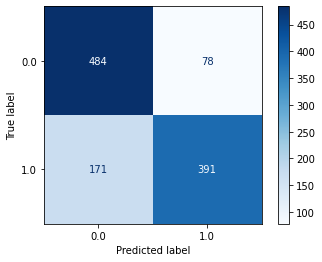

In [58]:
print("Confusion Matrix: Train")
plt.show(plot_confusion_matrix(classifier, X_train_smote, y_train_smote,cmap = 'Blues', values_format = 'g'))

Confusion Matrix: Test


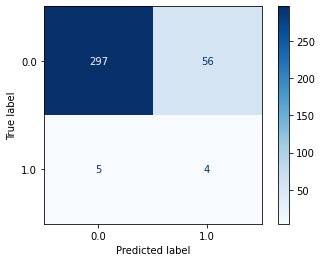

In [59]:
print("Confusion Matrix: Test")
plt.show(plot_confusion_matrix(classifier, X_test_smote, Y_test,cmap = 'Blues', values_format = 'g'))

In [60]:
 target_names = ['class 0', 'class 1']
 y_pred = classifier.predict(X_test_smote)
 print(classification_report(Y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      0.84      0.91       353
     class 1       0.07      0.44      0.12         9

    accuracy                           0.83       362
   macro avg       0.53      0.64      0.51       362
weighted avg       0.96      0.83      0.89       362



In [61]:
 target_names = ['class 0', 'class 1']
 print(classification_report(y_train_smote, classifier.predict(X_train_smote), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.74      0.86      0.80       562
     class 1       0.83      0.70      0.76       562

    accuracy                           0.78      1124
   macro avg       0.79      0.78      0.78      1124
weighted avg       0.79      0.78      0.78      1124



In [62]:
data_random

,Married,Dependents,Education,Self_Employed,LoanAmount
58,Yes,2,Graduate,No,0


In [63]:
y_random_pred = classifier.predict(X_random)
print("y predict: " , y_random_pred)

y predict:  [0.]


KNN

In [64]:
classifier = KNeighborsClassifier(n_neighbors= 2)
classifier.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

Confusion Matrix: Train


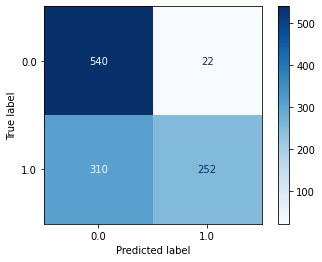

In [65]:
print("Confusion Matrix: Train")
plt.show(plot_confusion_matrix(classifier, X_train_smote, y_train_smote,cmap = 'Blues', values_format = 'g'))

Confusion Matrix: Test


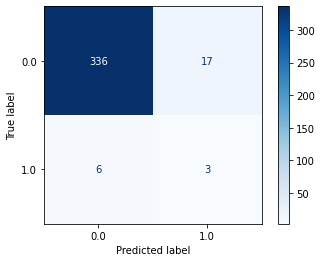

In [66]:
print("Confusion Matrix: Test")
plt.show(plot_confusion_matrix(classifier, X_test_smote, Y_test,cmap = 'Blues', values_format = 'g'))

In [67]:
 target_names = ['class 0', 'class 1']
 y_pred = classifier.predict(X_test_smote)
 print(classification_report(Y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      0.95      0.97       353
     class 1       0.15      0.33      0.21         9

    accuracy                           0.94       362
   macro avg       0.57      0.64      0.59       362
weighted avg       0.96      0.94      0.95       362



In [68]:
 target_names = ['class 0', 'class 1']
 print(classification_report(y_train_smote, classifier.predict(X_train_smote), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.64      0.96      0.76       562
     class 1       0.92      0.45      0.60       562

    accuracy                           0.70      1124
   macro avg       0.78      0.70      0.68      1124
weighted avg       0.78      0.70      0.68      1124



In [22]:
data_random

,Married,Dependents,Education,Self_Employed,LoanAmount
67,Yes,0,Graduate,No,0


In [23]:
y_random_pred = classifier.predict(X_random)
print("y predict: " , y_random_pred)

y predict:  [0.]


#ADASYN

In [69]:
#### ADASYN
ada = ADASYN() 
X_train_ada , y_train_ada = ada.fit_resample( X_train ,  Y_train ) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Dicision Tree

In [70]:
#Chuan hoa du lieu
SC = StandardScaler(with_mean=False)
X_train_ada = SC.fit_transform(X_train_ada)
X_test_ada =  SC.transform(X_test)

In [71]:
#huan luyen mo hinh
classifier = DecisionTreeClassifier(criterion ="entropy",splitter= 'random')
classifier.fit(X_train_ada, y_train_ada)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [74]:
 target_names = ['class 0', 'class 1']
 y_pred = classifier.predict(X_test_ada)
 print(classification_report(Y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      0.84      0.91       353
     class 1       0.07      0.44      0.12         9

    accuracy                           0.83       362
   macro avg       0.53      0.64      0.51       362
weighted avg       0.96      0.83      0.89       362



In [73]:
 target_names = ['class 0', 'class 1']
 print(classification_report(y_train_ada, classifier.predict(X_train_ada), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.75      0.86      0.80       562
     class 1       0.83      0.70      0.76       550

    accuracy                           0.78      1112
   macro avg       0.79      0.78      0.78      1112
weighted avg       0.79      0.78      0.78      1112



Confusion Matrix: Train


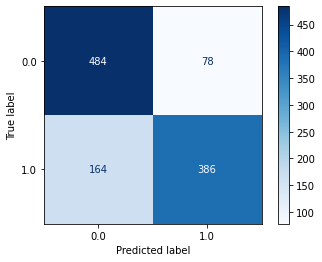

In [75]:
print("Confusion Matrix: Train")
plt.show(plot_confusion_matrix(classifier, X_train_ada, y_train_ada,cmap = 'Blues', values_format = 'g'))

Confusion Matrix: Test


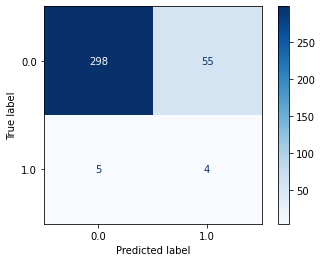

In [76]:
print("Confusion Matrix: Test")
plt.show(plot_confusion_matrix(classifier, X_test_ada, Y_test,cmap = 'Blues', values_format = 'g'))

KNN

In [77]:
classifier = KNeighborsClassifier(n_neighbors= 1)
classifier.fit(X_train_ada, y_train_ada)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [78]:
 target_names = ['class 0', 'class 1']
 y_pred = classifier.predict(X_test_ada)
 print(classification_report(Y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      0.92      0.94       353
     class 1       0.03      0.11      0.05         9

    accuracy                           0.90       362
   macro avg       0.50      0.51      0.50       362
weighted avg       0.95      0.90      0.92       362



In [79]:
 target_names = ['class 0', 'class 1']
 print(classification_report(y_train_ada, classifier.predict(X_train_ada), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.65      0.92      0.77       562
     class 1       0.86      0.50      0.63       550

    accuracy                           0.71      1112
   macro avg       0.76      0.71      0.70      1112
weighted avg       0.76      0.71      0.70      1112



Confusion Matrix: Train


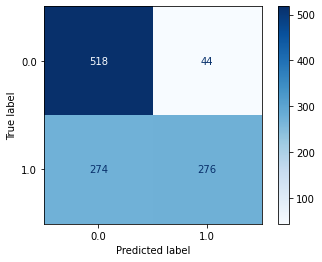

In [80]:
print("Confusion Matrix: Train")
plt.show(plot_confusion_matrix(classifier, X_train_ada, y_train_ada,cmap = 'Blues', values_format = 'g'))

Confusion Matrix: Test


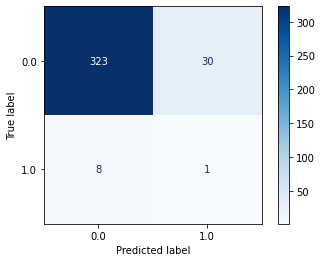

In [81]:
print("Confusion Matrix: Test")
plt.show(plot_confusion_matrix(classifier, X_test_ada, Y_test,cmap = 'Blues', values_format = 'g'))

#RandomOversampling

In [82]:
#OVersampling
ros = RandomOverSampler(random_state=0)
X_train_os, y_train_os = ros.fit_resample(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Chuẩn hoá dữ liệu

In [83]:
SC = StandardScaler(with_mean=False)
X_train_os = SC.fit_transform(X_train_os)
X_test_os =  SC.transform(X_test)

Disicion Tree

In [84]:
classifier = DecisionTreeClassifier(criterion ="entropy")
classifier.fit(X_train_os, y_train_os)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [85]:
 target_names = ['class 0', 'class 1']
 y_pred = classifier.predict(X_test_os)
 print(classification_report(Y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      0.83      0.90       353
     class 1       0.06      0.44      0.11         9

    accuracy                           0.82       362
   macro avg       0.52      0.64      0.51       362
weighted avg       0.96      0.82      0.88       362



In [86]:
 target_names = ['class 0', 'class 1']
 print(classification_report(y_train_os, classifier.predict(X_train_os), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.72      0.84      0.77       562
     class 1       0.81      0.67      0.73       562

    accuracy                           0.75      1124
   macro avg       0.76      0.75      0.75      1124
weighted avg       0.76      0.75      0.75      1124



Confusion Matrix: Train


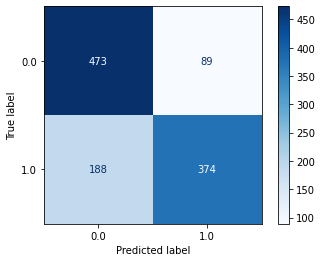

In [87]:
print("Confusion Matrix: Train")
plt.show(plot_confusion_matrix(classifier, X_train_os, y_train_os,cmap = 'Blues', values_format = 'g'))

Confusion Matrix: Test


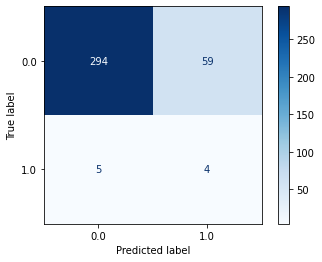

In [88]:
print("Confusion Matrix: Test")
plt.show(plot_confusion_matrix(classifier, X_test_os, Y_test,cmap = 'Blues', values_format = 'g'))

KNN

In [94]:
classifier = KNeighborsClassifier(n_neighbors= 2)
classifier.fit(X_train_os, y_train_os)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [95]:
 target_names = ['class 0', 'class 1']
 y_pred = classifier.predict(X_test_os)
 print(classification_report(Y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      0.95      0.97       353
     class 1       0.15      0.33      0.21         9

    accuracy                           0.94       362
   macro avg       0.57      0.64      0.59       362
weighted avg       0.96      0.94      0.95       362



In [96]:
 target_names = ['class 0', 'class 1']
 print(classification_report(y_train_os, classifier.predict(X_train_os), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.55      0.96      0.70       562
     class 1       0.84      0.20      0.33       562

    accuracy                           0.58      1124
   macro avg       0.69      0.58      0.51      1124
weighted avg       0.69      0.58      0.51      1124



Confusion Matrix: Train


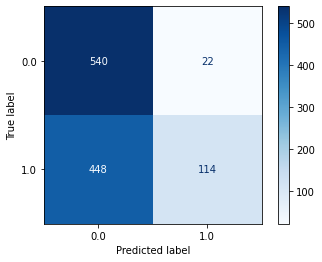

In [97]:
print("Confusion Matrix: Train")
plt.show(plot_confusion_matrix(classifier, X_train_os, y_train_os,cmap = 'Blues', values_format = 'g'))

Confusion Matrix: Test


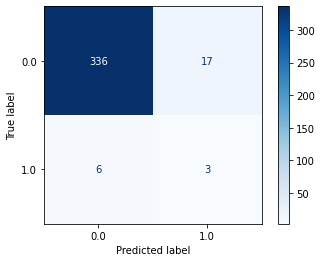

In [98]:
print("Confusion Matrix: Test")
plt.show(plot_confusion_matrix(classifier, X_test_os, Y_test,cmap = 'Blues', values_format = 'g'))